# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Pandas for Exploratory Data Analysis I 
by [@josephofiowa](https://twitter.com/josephofiowa)

Pandas is the most prominent Python library for exploratory data analysis (EDA). The functions Pandas supports are integral to understanding, formatting, and preparing our data. Formally, we use Pandas to investigate, wrangle, munge, and clean our data. Pandas is the Swiss Army Knife of data manipulation!


We'll have two coding-heavy sessions on Pandas. In this one, we'll use Pandas to:
 - Read in a dataset
 - Investigate a dataset's integrity
 - Filter, sort, and manipulate a DataFrame's series

## About the Dataset: Adventureworks Cycles

<img align="right" src="http://lh6.ggpht.com/_XjcDyZkJqHg/TPaaRcaysbI/AAAAAAAAAFo/b1U3q-qbTjY/AdventureWorks%20Logo%5B5%5D.png?imgmax=800">

For today's Pandas exercises, we will be using a dataset developed by Microsoft for training purposes in SQL server, known the [Adventureworks Cycles 2014OLTP Database](https://github.com/Microsoft/sql-server-samples/releases/tag/adventureworks). It is based on a fictitious company called Adventure Works Cycles (AWC), a multinational manufacturer and seller of bicycles and accessories. The company is based in Bothell, Washington, USA and has regional sales offices in several countries. We will be looking at a single table from this database, the Production.Product table, which outlines some of the products this company sells. 

A full data dictionary can be viewed [here](https://www.sqldatadictionary.com/AdventureWorks2014/).


Let's take a closer look at the Production.Product table [data dictionary](https://www.sqldatadictionary.com/AdventureWorks2014/Production.Product.html), which is a description of the fields (columns) in the table (the .csv file we will import below):
- **ProductID** - Primary key for Product records.
- **Name** - Name of the product.
- **ProductNumber** - Unique product identification number.
- **MakeFlag** - 0 = Product is purchased, 1 = Product is manufactured in-house.
- **FinishedGoodsFlag** - 0 = Product is not a salable item. 1 = Product is salable.
- **Color** - Product color.
- **SafetyStockLevel** - Minimum inventory quantity.
- **ReorderPoint** - Inventory level that triggers a purchase order or work order.
- **StandardCost** - Standard cost of the product.
- **ListPrice** - Selling price.
- **Size** - Product size.
- **SizeUnitMeasureCode** - Unit of measure for the Size column.
- **WeightUnitMeasureCode** - Unit of measure for the Weight column.
- **DaysToManufacture** - Number of days required to manufacture the product.
- **ProductLine** - R = Road, M = Mountain, T = Touring, S = Standard
- **Class** - H = High, M = Medium, L = Low
- **Style** - W = Womens, M = Mens, U = Universal
- **ProductSubcategoryID** - Product is a member of this product subcategory. Foreign key to ProductSubCategory.ProductSubCategoryID.
- **ProductModelID** - Product is a member of this product model. Foreign key to ProductModel.ProductModelID.
- **SellStartDate** - Date the product was available for sale.
- **SellEndDate** - Date the product was no longer available for sale.
- **DiscontinuedDate** - Date the product was discontinued.
- **rowguid** - ROWGUIDCOL number uniquely identifying the record. Used to support a merge replication sample.
- **ModifiedDate** - Date and time the record was last updated.


## Importing Pandas

To [import a library](https://docs.python.org/3/reference/import.html), we write `import` and the library name. For Pandas, is it common to name the library `pd` so that when we reference a function from the Pandas library, we only write `pd` to reference the aliased [namespace](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) -- not `pandas`.

In [2]:
import pandas as pd
%matplotlib inline

In [2]:
# we can see the details about the imported package by referencing its private class propertys:

## Reading in Data

Pandas dramatically simplifies the process of reading in data. When we say "reading in data," we mean loading a file into our machine's memory.

When you have a CSV, for example, and then you double-click to open it in Microsoft Excel, the open file is "read into memory." You can now manipulate the CSV.

When we read data into memory in Python, we are creating an object. We will soon explore this object. _(And, as an aside, when we have a file that is greater than the size of our computer's memory, this is approaching "Big Data.")_

Because we are working with a CSV, we will use the [read CSV](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method.<br>A [delimiter](https://en.wikipedia.org/wiki/Delimiter-separated_values) is a character that separates fields (columns) in the imported file. Just because a file says `.csv` does not necessarily mean that a comma is used as the delimiter. In this case, we have a tab character as the delimiter for our columns, so we will be using `sep='\t'` to tell pandas to 'cut' the columns every time it sees a [tab character in the file](http://vim.wikia.com/wiki/Showing_the_ASCII_value_of_the_current_character).

In [4]:
# read the dataset as a DataFrame into a variable named 'prod'
prod = pd.read_csv('Production.Product.csv', sep='\t')


In [5]:
prod.head()

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
2,3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000
3,4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B},2014-02-08 10:01:36.827000000
4,316,Blade,BL-2036,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{E73E9750-603B-4131-89F5-3DD15ED5FF80},2014-02-08 10:01:36.827000000


In [5]:
prod.tail(15)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
489,985,"Mountain-500 Silver, 42",BK-M18S-42,1,1,Silver,100,75,308.2179,564.99,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{B8D1B5D9-8A39-4097-A04A-56E95559B534},2014-02-08 10:01:36.827000000
490,986,"Mountain-500 Silver, 44",BK-M18S-44,1,1,Silver,100,75,308.2179,564.99,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{E8CEC794-E8E2-4312-96A7-4832E573D3FC},2014-02-08 10:01:36.827000000
491,987,"Mountain-500 Silver, 48",BK-M18S-48,1,1,Silver,100,75,308.2179,564.99,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{77EF419F-481F-40B9-BDB9-7E6678E550E3},2014-02-08 10:01:36.827000000
492,988,"Mountain-500 Silver, 52",BK-M18S-52,1,1,Silver,100,75,308.2179,564.99,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{CAD60945-183E-4AB3-A70C-3F5BAC6BF134},2014-02-08 10:01:36.827000000
493,989,"Mountain-500 Black, 40",BK-M18B-40,1,1,Black,100,75,294.5797,539.99,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{28287157-3F06-487B-8531-BEE8A37329E4},2014-02-08 10:01:36.827000000
494,990,"Mountain-500 Black, 42",BK-M18B-42,1,1,Black,100,75,294.5797,539.99,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{F5752C9C-56BA-41A7-83FD-139DA28C15FA},2014-02-08 10:01:36.827000000
495,991,"Mountain-500 Black, 44",BK-M18B-44,1,1,Black,100,75,294.5797,539.99,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{C7852127-2FB8-4959-B5A3-DE5A8D6445E4},2014-02-08 10:01:36.827000000
496,992,"Mountain-500 Black, 48",BK-M18B-48,1,1,Black,100,75,294.5797,539.99,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{75752E26-A3B6-4264-9B06-F23A4FBDC5A7},2014-02-08 10:01:36.827000000
497,993,"Mountain-500 Black, 52",BK-M18B-52,1,1,Black,100,75,294.5797,539.99,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{69EE3B55-E142-4E4F-AED8-AF02978FBE87},2014-02-08 10:01:36.827000000
498,994,LL Bottom Bracket,BB-7421,1,1,NaN,500,375,23.9716,53.99,...,NaN,L,NaN,5.0,95.0,2013-05-30 00:00:00,NaN,NaN,{FA3C65CD-0A22-47E3-BDF6-53F1DC138C43},2014-02-08 10:01:36.827000000


*Documentation Pause*

How did we know how to use `pd.read_csv`? Let's take a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). Note the first argument required (`filepath`).
> Take a moment to dissect other arguments and options when reading in data.

In [7]:
# to check where you are now (your location)

# pwd

NameError: name 'pwd' is not defined

We have just created a data structure called a `DataFrame`. See?

In [10]:
# show type of prod -----. DataFrame : when you pull excel to Panda it's called DataFrame
type(prod)

pandas.core.frame.DataFrame

## Inspecting our DataFrame: The basics

We'll now perform basic operations on the DataFrame, denoted with comments.

In [11]:
# print the first and last 3 rows
# prod.head(3)
prod.tail(3)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
501,997,"Road-750 Black, 44",BK-R19B-44,1,1,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30 00:00:00,NaN,NaN,{44CE4802-409F-43AB-9B27-CA53421805BE},2014-02-08 10:01:36.827000000
502,998,"Road-750 Black, 48",BK-R19B-48,1,1,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30 00:00:00,NaN,NaN,{3DE9A212-1D49-40B6-B10A-F564D981DBDE},2014-02-08 10:01:36.827000000
503,999,"Road-750 Black, 52",BK-R19B-52,1,1,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30 00:00:00,NaN,NaN,{AE638923-2B67-4679-B90E-ABBAB17DCA31},2014-02-08 10:01:36.827000000


Notice that `.head()` is a method (denoted by parantheses), so it takes arguments.

**Class Question:** 
- What do you think changes if we pass a different number `head()` argument?
- How would we print the last 5 rows?

In [12]:
# identify the shape (rows by columns)
prod.shape

# for extra # file_shape = prod.shape  #you cold save it as a variale for future use

(504, 25)

Here we have 504 rows, and 25 columns. This is a tuple, so we can extract the parts using indexing:

In [13]:
# print the number of rows as an int
file_shape = prod.shape  #you cold save it as a variale for future use --- > I declear it above I could use it
prod.shape[0] # will give you  the rows
prod.shape[1] #will give you  the columns ... 

25

## Using the index
An [index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html) is an immutable ndarray implementing an ordered, sliceable set. The basic object storing axis labels for all pandas objects. Think of it as a 'row address' for your data frame (table). It is best practice to explicitly set the index of your dataframe, as these are commonly used as [primary keys](https://en.wikipedia.org/wiki/Primary_key) which can be used to [join](https://www.w3schools.com/sql/sql_join.asp) your dataframe to other dataframes.

The dataframe can store different types (int, string, datetime), and when importing data will automatically assign a number to each row, starting at zero and counting up. You can overwrite this, which is what we are going to do.

In [14]:
# displaying the index as it sits (auto-generated upon import)
prod.index # give me the size of my data

RangeIndex(start=0, stop=504, step=1)

In [15]:
# also note that our auto-generated index has no name
print(prod.index.name)

None


In [16]:
# Here we are looking at three columns;
# the one on the left is the index (automatically generated upon import by pandas)
# 'ProductID' is our PK (primary key) from our imported table. 'Name' is a data column.
# Notice that the generated index starts at zero and our PK starts at 1.
prod[['ProductID',"Name"]].head()

,ProductID,Name
0,1,Adjustable Race
1,2,Bearing Ball
2,3,BB Ball Bearing
3,4,Headset Ball Bearings
4,316,Blade


In [17]:
# Setting the index overwrites the automatically generated index
# with our PK, which resided in the 'ProductID' column.
prod.set_index('ProductID', inplace=True) # inplace : means to put it permnnt : will change it not teperorry... 
# mean I make the change to the data frame ... if (false : if you go to the next cell won't work)

In [62]:
# Note how our index property has changed as a result
prod.index

Int64Index([  1,   2,   3,   4, 316, 317, 318, 319, 320, 321,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', name='ProductID', length=504)

In [65]:
# And our index has also inherited the name of our 'ProductID' column
prod.index.name


'ProductID'

## Column headers and datatypes

In [18]:
# print the columns
prod.columns


Index(['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')

In [19]:
# examine the datatypes of the columns
prod.dtypes
# note that these were automatically inferred by pandas upon import!
prod.dtypes

Name                      object
ProductNumber             object
MakeFlag                   int64
FinishedGoodsFlag          int64
Color                     object
SafetyStockLevel           int64
ReorderPoint               int64
StandardCost             float64
ListPrice                float64
Size                      object
SizeUnitMeasureCode       object
WeightUnitMeasureCode     object
Weight                   float64
DaysToManufacture          int64
ProductLine               object
Class                     object
Style                     object
ProductSubcategoryID     float64
ProductModelID           float64
SellStartDate             object
SellEndDate               object
DiscontinuedDate         float64
rowguid                   object
ModifiedDate              object
dtype: object

**Class Question:** Why do datatypes matter? What operations could we perform on some datatypes that we could not on others? Note the importance of this in checking dataset integrity.

## Selecting a Columns

We can select columns in two ways. Either we treat the column as an attribute of the DataFrame or we index the DataFrame for a specific element (in this case, the element is a column name).

In [20]:
# show difference between single (Series) and double (DataFrame) bracket notation
#prod.Color # it is like a single colume ......>> [[]] as it double we'll mean dataframe, if it [] we mean series
# not a dataframe
# prod[['Color']]   # it'll ... 
prod[['Color', 'Name', 'ListPrice']]
# prod[['Name', 'ListPrice']]
# prod.Color.unique() # for distict colors

,Color,Name,ListPrice
ProductID,,,
1,NaN,Adjustable Race,0.00
2,NaN,Bearing Ball,0.00
3,NaN,BB Ball Bearing,0.00
4,NaN,Headset Ball Bearings,0.00
316,NaN,Blade,0.00
...,...,...,...
995,NaN,ML Bottom Bracket,101.24
996,NaN,HL Bottom Bracket,121.49
997,Black,"Road-750 Black, 44",539.99


In [21]:
# select the Name column, Series object
prod.Name.head() # as a series


ProductID
1            Adjustable Race
2               Bearing Ball
3            BB Ball Bearing
4      Headset Ball Bearings
316                    Blade
Name: Name, dtype: object

In [92]:
# select the Name column, DataFrame object
prod[['Name']].head() # as a dataframe

,Name
ProductID,
1,Adjustable Race
2,Bearing Ball
3,BB Ball Bearing
4,Headset Ball Bearings
316,Blade


In [22]:
# selecting > 1 column (must use double brackets!)
# prod[["Name", "ProducrName", "ListPrice", "Size"]].head()
prod[['Name', 'ListPrice', 'Color']].head()

,Name,ListPrice,Color
ProductID,,,
1,Adjustable Race,0.0,NaN
2,Bearing Ball,0.0,NaN
3,BB Ball Bearing,0.0,NaN
4,Headset Ball Bearings,0.0,NaN
316,Blade,0.0,NaN


**Class Question:** What if we wanted to select a column that has a space in it? Which method from the above two would we use? Why?

## Renaming Columns

Perhaps we want to rename our columns. There are a few options for doing this.

Renaming **specific** columns by using a dictionary:

In [23]:
# rename one or more columns with a dictionary. Note: inplace=False will return a new dataframe,
# but leave the original dataframe untouched. Change this to True to modify the original dataframe.
print("My Columns Looks Like:\n", prod.columns)

My Columns Looks Like:
 Index(['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')


In [24]:
print("And the typs are:\n", type(prod.columns))

And the typs are:
 <class 'pandas.core.indexes.base.Index'>


Renaming **ALL** columns with a new list of column names.

Note that the `pd.DataFrame.columns` property can be cast to a `list` type. Originally, it's a `pd.core.indexes.base.Index` object:

In [25]:
prod.columns

Index(['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')

In [26]:
#to rename
prod.rename(columns={'ProductName':'Name','Number':'ProductNumber'},inplace = True)
# prod.head()

In [27]:
prod.head()

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000
4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B},2014-02-08 10:01:36.827000000
316,Blade,BL-2036,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{E73E9750-603B-4131-89F5-3DD15ED5FF80},2014-02-08 10:01:36.827000000


In [0]:
# show values and type of columns

We can explicitly cast these to a list object as such, by using the built-in `list()` function:

In [0]:
# cast above to list object

We can place these columns into a variable, `cols`:

In [0]:
# declare a list of strings - these strings will become the new column names

We can use list indexing to mutate the columns we want:

In [0]:
# mutate list

Finally, we can set the `pd.DataFrame.columns` property (this is a settable class property), to the new `cols` list, overwriting the existing columns header names:

In [0]:
# Note that our first column name has changed from 'Name' to 'NewName'

In [0]:
# display mutated column header

## Common Column Operations

While this is non-comprehensive, these are a few key column-specific data checks.


**Descriptive statistics:**  the minimum, first quartile, median, third quartile, and maximum.

(And more! The mean too.)

Five Number Summary (all assumes numeric data):
- **Min:** The smallest value in the column
- **Max:** The largest value in the column
- **Quartile:** A quartile is one fourth of our data
    - **First quartile:** This is the bottom most 25 percent
    - **Median:** The middle value. (Line all values biggest to smallest - median is the middle!) Also the 50th percentile
    - **Third quartile:** This the the top 75 percentile of our data


![](https://www.mathsisfun.com/data/images/quartiles-a.svg)

In [134]:
# note - describe *default* only checks numeric datatypes
prod['ListPrice'].describe()

count     504.000000
mean      438.666250
std       773.602843
min         0.000000
25%         0.000000
50%        49.990000
75%       564.990000
max      3578.270000
Name: ListPrice, dtype: float64

In [29]:
prod[['ListPrice', 'StandardCost', 'SafetyStockLevel']].describe()

,ListPrice,StandardCost,SafetyStockLevel
count,504.000000,504.000000,504.000000
mean,438.666250,258.602961,535.150794
std,773.602843,461.632808,374.112954
min,0.000000,0.000000,4.000000
25%,0.000000,0.000000,100.000000
50%,49.990000,23.372200,500.000000
75%,564.990000,317.075825,1000.000000
max,3578.270000,2171.294200,1000.000000


In [30]:
prod['Color'].value_counts(dropna=False) #included NaN

NaN             248
Black            93
Silver           43
Red              38
Yellow           36
Blue             26
Multi             8
Silver/Black      7
White             4
Grey              1
Name: Color, dtype: int64

**Value Counts:** `pd.Series.value_counts()` count the occurrence of each value within our series.

In [31]:
# show the most popular product colors (aggregated by count, descending by default)
prod['Color'].value_counts(dropna=False) #included NaN

NaN             248
Black            93
Silver           43
Red              38
Yellow           36
Blue             26
Multi             8
Silver/Black      7
White             4
Grey              1
Name: Color, dtype: int64

**Unique values:** Determine the number of distinct values within a given series.

In [32]:
# What are the unique colors for the products?
prod["Color"].unique()

array([nan, 'Black', 'Silver', 'Red', 'White', 'Blue', 'Multi', 'Yellow',
       'Grey', 'Silver/Black'], dtype=object)

In [127]:
#To convert into a list structure
color_list = list(prod["Color"].unique())
color_list

[nan,
 'Black',
 'Silver',
 'Red',
 'White',
 'Blue',
 'Multi',
 'Yellow',
 'Grey',
 'Silver/Black']

In [33]:
# HOW MANY distinct colors are there?
prod["Color"].nunique() #it skipping null 

9

In [34]:
#this will include null
prod["Color"].nunique(dropna=False) 

10

## Filtering

Filtering and sorting are key processes that allow us to drill into the 'nitty gritty' and cross sections of our dataset.

To filter, we use a process called **Boolean Filtering**, wherein we define a Boolean condition, and use that Boolean condition to filer on our DataFrame.

Recall: our given dataset has a column `Color`. Let's see if we can find all products that are `Black`. Let's take a look at the first 10 rows of the dataframe to see how it looks as-is:

In [37]:
# show Color column as it sits
prod['Color'].head(10)


ProductID
1         NaN
2         NaN
3         NaN
4         NaN
316       NaN
317     Black
318     Black
319     Black
320    Silver
321    Silver
Name: Color, dtype: object

In [44]:
prod['Color'].head(10)== 'Black'

ProductID
1      False
2      False
3      False
4      False
316    False
317     True
318     True
319     True
320    False
321    False
Name: Color, dtype: bool

By applying a `boolean mask` to this dataframe, `== 'Black'`, we can get the following:

In [43]:
#to show all black
prod[prod['Color']== 'Black'].head()

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
317,LL Crankarm,CA-5965,0,0,Black,500,375,0.00,0.0,NaN,...,NaN,L,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{3C9D10B7-A6B2-4774-9963-C19DCEE72FEA},2014-02-08 10:01:36.827000000
318,ML Crankarm,CA-6738,0,0,Black,500,375,0.00,0.0,NaN,...,NaN,M,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{EABB9A92-FA07-4EAB-8955-F0517B4A4CA7},2014-02-08 10:01:36.827000000
319,HL Crankarm,CA-7457,0,0,Black,500,375,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{7D3FD384-4F29-484B-86FA-4206E276FE58},2014-02-08 10:01:36.827000000
322,Chainring,CR-7833,0,0,Black,1000,750,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{F0AC2C4D-1A1F-4E3C-B4D9-68AEA0EC1CE4},2014-02-08 10:01:36.827000000
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.31,1431.5,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000


In [0]:
# demonstrate boolean mask

Now we can use that 'mask' from above, and apply it to our full dataframe. Every time we have a `True` in a row, we return the row. If we have a `False` in that row, we do not return it. The result is a dataframe that only has rows where `Color` is `Black`:

Let's calculate the **average ListPrice** for the **salable products**.

> Think: What are the component parts of this problem?

In [0]:
# First, we need to get salable items. Use your data dictionary from the beginning of this lesson.
#columns could be FInishieGoodFlag and compare to 

In [58]:
#to grap the colums and see 4 example the first :..------>>> if you want the whole dataframe just leave ,head()
prod[prod['FinishedGoodsFlag']== 1].head(3)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
706,"HL Road Frame - Red, 58",FR-R92R-58,1,1,Red,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{9540FF17-2712-4C90-A3D1-8CE5568B2462},2014-02-08 10:01:36.827000000
707,"Sport-100 Helmet, Red",HL-U509-R,0,1,Red,4,3,13.0863,34.99,NaN,...,S,NaN,NaN,31.0,33.0,2011-05-31 00:00:00,NaN,NaN,{2E1EF41A-C08A-4FF6-8ADA-BDE58B64A712},2014-02-08 10:01:36.827000000


Now, we need to find average list price of those above items. Let's just get the 'ListPrice' column for starters.

In [59]:
#to grap the colums and see 4 example the first 
prod[prod['FinishedGoodsFlag']== 1]['ListPrice'].head(3)

ProductID
680    1431.50
706    1431.50
707      34.99
Name: ListPrice, dtype: float64

To get the average of that column, just take `.mean()`

In [60]:
prod[prod['FinishedGoodsFlag']== 1]['ListPrice'].mean()

744.595220338982

We can take a shortcut and just use `.describe()` here:

In [61]:
prod[prod['FinishedGoodsFlag']== 1]['ListPrice'].describe()

count     295.000000
mean      744.595220
std       892.563172
min         2.290000
25%        66.745000
50%       337.220000
75%      1100.240000
max      3578.270000
Name: ListPrice, dtype: float64

**Sneak peek**: Another handy trick is to use `.hist()` to get a distribution of a continuous variable - in this case, `ListPrice`. We'll cover this more in future lessons:

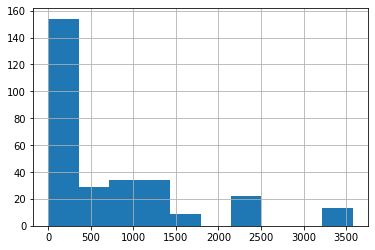

In [63]:
prod[prod['FinishedGoodsFlag']== 1]['ListPrice'].hist(grid=True, bins = 10)

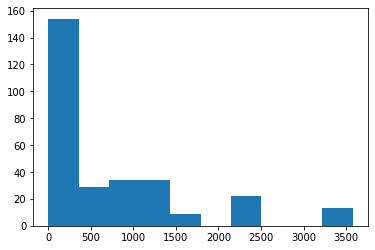

In [64]:
prod[prod['FinishedGoodsFlag']== 1]['ListPrice'].hist(grid=False, bins = 10)

In [ ]:
#Just Info:
# Filtering on Multiple Conditions
# Here, we will filter on multiple conditions. Before, we filtered on rows where Color was Black. We also filtered where FinishedGoodsFlag was equal to 1. Let's see what happens when we filter on both simultaneously.
# The format for multiple conditions is:
# df[ (df['col1'] == value1) & (df['col2'] == value2) ]
# Or, more simply:
# df[ (CONDITION 1) & (CONDITION 2) ]
# Which eventually may evaluate to something like:
# df[ True & False ]
# ...on a row-by-row basis. If the end result is False, the row is omitted.
# Don't forget parentheses in your conditions! This is a common mistake.

## Sorting

We can sort one column of our DataFrame as well.

In [67]:
# let's sort by standard cost, descending
prod[(prod['Color']== 'Black') & (prod['FinishedGoodsFlag']== 1)].head()

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
708,"Sport-100 Helmet, Black",HL-U509,0,1,Black,4,3,13.0863,34.99,NaN,...,S,NaN,NaN,31.0,33.0,2011-05-31 00:00:00,NaN,NaN,{A25A44FB-C2DE-4268-958F-110B8D7621E2},2014-02-08 10:01:36.827000000
722,"LL Road Frame - Black, 58",FR-R38B-58,1,1,Black,500,375,204.6251,337.22,58,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{2140F256-F705-4D67-975D-32DE03265838},2014-02-08 10:01:36.827000000
723,"LL Road Frame - Black, 60",FR-R38B-60,1,1,Black,500,375,204.6251,337.22,60,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{AA95E2A5-E7C4-4B74-B1EA-B52EE3B51537},2014-02-08 10:01:36.827000000
724,"LL Road Frame - Black, 62",FR-R38B-62,1,1,Black,500,375,204.6251,337.22,62,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{5247BE33-50BF-4527-8A30-A39AAE500A8E},2014-02-08 10:01:36.827000000


In [68]:
# let's take a look at the type
prod.sort_values(by='StandardCost', ascending=False).head()

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
749,"Road-150 Red, 62",BK-R93R-62,1,1,Red,100,75,2171.2942,3578.27,62,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{BC621E1F-2553-4FDC-B22E-5E44A9003569},2014-02-08 10:01:36.827000000
750,"Road-150 Red, 44",BK-R93R-44,1,1,Red,100,75,2171.2942,3578.27,44,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{C19E1136-5DA4-4B40-8758-54A85D7EA494},2014-02-08 10:01:36.827000000
751,"Road-150 Red, 48",BK-R93R-48,1,1,Red,100,75,2171.2942,3578.27,48,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{D10B7CC1-455E-435B-A08F-EC5B1C5776E9},2014-02-08 10:01:36.827000000
752,"Road-150 Red, 52",BK-R93R-52,1,1,Red,100,75,2171.2942,3578.27,52,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{5E085BA0-3CD5-487F-85BB-79ED1C701F23},2014-02-08 10:01:36.827000000
753,"Road-150 Red, 56",BK-R93R-56,1,1,Red,100,75,2171.2942,3578.27,56,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{30819B88-F0D3-4E7A-8105-19F6FAC2CEFB},2014-02-08 10:01:36.827000000


In [69]:
# let's take a look at the type
prod.sort_values(by='StandardCost', ascending=True).head()

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
449,Lock Nut 1,LN-4400,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{1DC29704-E0E0-4EF5-B581-4A524730C448},2014-02-08 10:01:36.827000000
450,Lock Nut 10,LN-5161,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{612C26C7-6018-4050-B628-8B2D2E6841FA},2014-02-08 10:01:36.827000000
451,Lock Nut 11,LN-5162,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{5BCC4558-6C16-48F1-92F0-FD2EEFB17306},2014-02-08 10:01:36.827000000
452,Lock Nut 2,LN-5400,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{53AD147D-C16D-4A8C-B086-625A31405574},2014-02-08 10:01:36.827000000


In [70]:
# let's take a look at the type
prod.sort_values(by='SafetyStockLevel', ascending=True).head()

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
866,"Classic Vest, L",VE-C304-L,0,1,Blue,4,3,23.7490,63.50,L,...,S,NaN,U,25.0,1.0,2013-05-30 00:00:00,NaN,NaN,{3211F5A8-B6C4-48BD-9AA4-D69CB40D97DD},2014-02-08 10:01:36.827000000
856,"Men's Bib-Shorts, M",SB-M891-M,0,1,Multi,4,3,37.1209,89.99,M,...,S,NaN,M,18.0,12.0,2012-05-30 00:00:00,2013-05-29 00:00:00,NaN,{E0CBEC04-F4FC-450F-9780-F8EA7691FEBD},2014-02-08 10:01:36.827000000
855,"Men's Bib-Shorts, S",SB-M891-S,0,1,Multi,4,3,37.1209,89.99,S,...,S,NaN,M,18.0,12.0,2012-05-30 00:00:00,2013-05-29 00:00:00,NaN,{9F60AF1E-4C11-4E90-BAEA-48E834E8B4C2},2014-02-08 10:01:36.827000000
854,"Women's Tights, L",TG-W091-L,0,1,Black,4,3,30.9334,74.99,L,...,S,NaN,W,24.0,38.0,2012-05-30 00:00:00,2013-05-29 00:00:00,NaN,{E378C2F3-54F6-4EA9-B049-E8BB32B5BDFD},2014-02-08 10:01:36.827000000
853,"Women's Tights, M",TG-W091-M,0,1,Black,4,3,30.9334,74.99,M,...,S,NaN,W,24.0,38.0,2012-05-30 00:00:00,2013-05-29 00:00:00,NaN,{4D8E186C-B8C9-4C64-B411-4995DD87E316},2014-02-08 10:01:36.827000000


In [71]:
# let's take a look at the type
prod.sort_values(by='SafetyStockLevel', ascending=False).head()

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
411,External Lock Washer 2,LE-8000,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{502A2A3D-CD72-43AD-8FB6-77505187EDF4},2014-02-08 10:01:36.827000000
435,Thin-Jam Lock Nut 8,LJ-7162,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{B2508CF2-C64F-493D-9DB4-0D6601AF1F73},2014-02-08 10:01:36.827000000
436,Thin-Jam Lock Nut 12,LJ-9080,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{5D3E589F-4584-406B-B9CC-3C8C060CB9A5},2014-02-08 10:01:36.827000000
437,Thin-Jam Lock Nut 11,LJ-9161,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{64169A28-161C-4737-B724-F42FFD99DE80},2014-02-08 10:01:36.827000000


This one is a little more advanced, but it demonstrates a few things:
- Conversion of a `numpy.ndarray` object (return type of `pd.Series.unique()`) into a `pd.Series` object
- `pd.Series.sort_values` with the `by=` kwarg omitted (if only one column is the operand, `by=` doesn't need specified
- Alphabetical sort of a string field, `ascending=True` means A->Z
- Inclusion of nulls, `NaN` in a string field (versus omission with a float/int as prior example)

## Independent Exercises

Do your best to complete the following prompts. Don't hesitate to look at code we wrote together!

Print the first 4 rows of the whole DataFrame.

In [78]:
# your answer here
prod.head(4)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000
4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B},2014-02-08 10:01:36.827000000


How many rows are in the dataframe? Return the answer as an int.

In [80]:
# your answer here
prod.shape[0]

504

How many columns? Retrun the answer as an int.

In [133]:
# your answer here
prod.shape[1]

24

How many different product lines are there?

In [126]:
# your answer here
prod['ProductLine'].nunique()

4

What are the values of these product lines?

In [137]:
prod['ProductLine'].unique()

array([nan, 'R ', 'S ', 'M ', 'T '], dtype=object)

In [125]:
# your answer here
prod['ProductLine'].value_counts()



R     100
M      91
T      52
S      35
Name: ProductLine, dtype: int64

Do the number of values for the product lines match the number you have using `.nunique()`? Why or why not?

In [131]:
# your answer here
#pd.Series.nunique() does not count nulls, seen as nan in a np.ndarray.

What's the length of the field corresponding to `Road` within the `ProductLine` column?

In [138]:
# your answer here
print(prod['ProductLine'].unique()[1])
print(len(prod['ProductLine'].unique()[1]))

R 
2


In [ ]:
#Just from SLACK start

In [ ]:
# Print first 4 rows --  head(4)
# Rows of DataFrame -- df.shape[0]
# Columns of DatafFrame -- df.shape[1]
# How many different product lines -- nunique()
# What are the values of these product lines? unique()
# Do the number of values for the product lines match the number you have using .nunique()? Why or why not?
# # pd.Series.nunique() does not count nulls, seen as nan in a np.ndarray.
# Take the output from your previous answer (using .unique()). Select the label corresponding to the Road product line using list indexing notation. How many characters are in this string?
# print(df['column_name'].unique()[1])
# print(len(df['column_name'].unique()[1]))
# Do you notice anything odd about this? Yes, trailing whitespace
# How many products are there for the Road product line?
# prod[prod['ProductLine'] == 'R '].shape[0]
# How many products are there in the Women's Mountain category?
# combine into one view 
# (prod['ProductLine'] == 'M ') 
# and
#  (prod['Style'] == 'W ')]
# and find the use shape command with index of 0

In [ ]:
#Just from SLACK Finished

Do you notice anything odd about this?

In [0]:
# your answer here

How many products are there for the `Road` product line? Don't forget what you just worked on above! Return your answer as an int.

In [141]:
# your answer here.. --->> how many rows?
prod[prod['ProductLine']== 'R '].shape[0]# space afer R to accumadate ...

100

How many products are there in the `Women's` `Mountain` category? Return your answer as an int. _Hint: Use the data dictionary above!_

In [146]:
# your answer here.. two things need to put together...--->> also there's a space afer M and W to acoumadate the #data... ---> it's like if statements 
prod[(prod['ProductLine'] == 'M ') & (prod['Style']=='W ')].shape[0]


11

**Challenge:** What are the top 3 _most expensive list price_ product that are either in the `Women's` `Mountain` category, _OR_ `Silver` in `Color`? Return your answer as a DataFrame object, with the `ProductID` index, `NewName` relabeled as `Name`, and `ListPrice` columns. Perform the statement in one execution, and do not mutate the source DataFrame.

In [0]:
# your answer here

## Recap

We covered a lot of ground! It's ok if this takes a while to gel.

```python

# basic DataFrame operations
df.head()
df.tail()
df.shape
df.columns
df.Index

# selecting columns
df.column_name
df['column_name']

# renaming columns
df.rename({'old_name':'new_name'}, inplace=True)
df.columns = ['new_column_a', 'new_column_b']

# notable columns operations
df.describe() # five number summary
df.column_name.nunique() # number of unique values
df.column_name.value_counts() # number of occurrences of each value in column

# filtering
df[df.column_name < 50] # filter column to be less than 50

# sorting
df.sort_values(by='column_name', ascending = False) # sort biggest to smallest

```


It's common to refer back to your own code *all the time.* Don't hesistate to reference this guide! 🐼


